In [3]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [7]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [9]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("diabetes.csv")

# Check dataset structure
print(df.info())  # Ensure all columns are numeric

# Define features (X) and target (y)
X = df.drop(columns=['Outcome'])  # 'Outcome' is the target column
y = df['Outcome']

# Convert to numeric (if needed)
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

# Handle missing values (if any)
X = X.dropna()
y = y[X.index]  # Keep y aligned with X after dropping NaN rows

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Scale the features (recommended for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate and train the Logistic Regression model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

print("Model trained successfully!")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Model trained successfully!


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load dataset
df = pd.read_csv("diabetes.csv")

# Define features (X) and target (y)
X = df.drop(columns=['Outcome'])  # Assuming 'Outcome' is the target column
y = df['Outcome']

# Convert to numeric (if needed)
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

# Handle missing values (if any)
X = X.dropna()
y = y[X.index]  # Align y with X after dropping NaN rows

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cnf_matrix)


Confusion Matrix:
[[95  7]
 [21 31]]


In [36]:
import numpy as np  # Import NumPy if needed

# If you are manually defining an array
cnf_matrix = np.array([[115, 8],
                       [30, 39]])

print(cnf_matrix)


[[115   8]
 [ 30  39]]


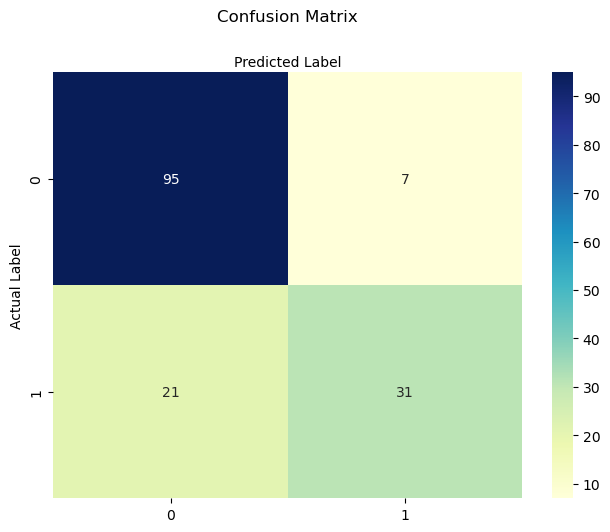

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Assuming y_test and y_pred are already defined
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)  # Ensure this is run before visualization

# Define class labels
class_names = [0, 1]  

# Create a figure
fig, ax = plt.subplots()

# Define tick marks
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Adjust layout
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

# Show the plot
plt.show()


In [40]:
y_pred = logreg.predict(X_test)  # Ensure model has been trained before this step


In [42]:
  import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("diabetes.csv")

# Define features (X) and target (y)
X = df.drop(columns=['Outcome'])  # 'Outcome' is the target column
y = df['Outcome']

# Convert to numeric (if needed)
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

# Handle missing values
X = X.dropna()
y = y[X.index]  # Align target variable

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Classification Report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))


                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       102
   with diabetes       0.82      0.60      0.69        52

        accuracy                           0.82       154
       macro avg       0.82      0.76      0.78       154
    weighted avg       0.82      0.82      0.81       154



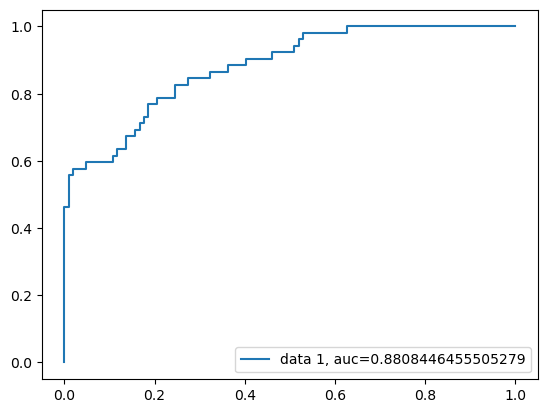

In [44]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()